In [ ]:
!pip install fancyimpute

In [ ]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from fancyimpute import IterativeImputer

In [ ]:
#import data
#import data
train_labels = pd.read_csv('/content/drive/MyDrive/cs1/training_set_labels.csv')
train_values = pd.read_csv('/content/drive/MyDrive/cs1/training_Set_values.csv', parse_dates = ['date_recorded' ],  na_values = [0, '0'])
test_values = pd.read_csv('/content/drive/MyDrive/cs1/test_set_value.csv', parse_dates = ['date_recorded' ],  na_values = [0, '0'])


#merge train values and train labels to single dataset
train= pd.merge(train_labels , train_values, on='id')
train.head()


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
test_values.shape

(14850, 40)

In [ ]:
train_values.shape

(59400, 40)

In [ ]:
#concatenate train and test for data visualization
df = pd.concat([train, test_values])
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
df.shape

(74249, 41)

### installer column

In [ ]:
df['installer'].value_counts().head(35) #taking most 25 common installer
#here we will focus on values that occure more than [400,300,200] and rest we will convert to others we will try different values then pick one which gives best results

DWE                   21751
Government             2282
RWE                    1498
Commu                  1347
DANIDA                 1305
KKKT                   1120
Hesawa                 1070
TCRS                    887
CES                     765
Central government      764
DANID                   690
Community               687
HESAWA                  679
District Council        663
World vision            517
TASAF                   503
LGA                     501
WEDECO                  496
District council        490
Gover                   483
AMREF                   398
TWESA                   395
WU                      377
Dmdd                    356
ACRA                    346
World Vision            326
SEMA                    311
DW                      308
OXFAM                   288
Da                      287
UNICEF                  285
Gove                    276
Kiliwater               271
FinW                    267
Villagers               262
Name: installer, dty

There are lots of NaN and 0 values in this column. Firstly, we will convert them to unknown.

In [ ]:
# test_values train_values
train_values['installer'].fillna(value='Unknown',inplace=True)  # filling null values with unknown
test_values['installer'].fillna(value='Unknown',inplace=True)  # filling null values with unknown


In [ ]:
train_values['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown

In [ ]:
test_values['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown

In [ ]:
# From the most common 100 value counts we realized some spelling mistakes or different syntax between same categories
# Replacing the spelling mistakes and collect same categories in same name
# # test_values 
train_values['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

train_values['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
train_values['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

train_values['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

train_values['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

train_values['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

train_values['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

train_values['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
train_values['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

train_values['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

train_values['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

train_values['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

train_values['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [ ]:
# From the most common 100 value counts we realized some spelling mistakes or different syntax between same categories
# Replacing the spelling mistakes and collect same categories in same name

test_values['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

test_values['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
test_values['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

test_values['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

test_values['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

test_values['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

test_values['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

test_values['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
test_values['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

test_values['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

test_values['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

test_values['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

test_values['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [ ]:
# continue to replacing spellin mistakes and getting together values
# test_values train_values
train_values['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
train_values['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
train_values['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
train_values['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
train_values['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
train_values['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
train_values['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
train_values['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
train_values['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
train_values['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [ ]:
# continue to replacing spellin mistakes and getting together values
test_values['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
test_values['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
test_values['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
test_values['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
test_values['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
test_values['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
test_values['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
test_values['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
test_values['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
test_values['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [ ]:
train_values['installer'].value_counts().head(25) #taking most 25 common installer

DWE                   17402
Unknown                4435
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               461
villagers               408
LGA                     408
WEDECO                  397
TASAF                   396
Unicef                  332
AMREF                   329
TWESA                   316
WU                      301
Dmdd                    287
ACRA                    278
Name: installer, dtype: int64

In [ ]:
test_values['installer'].value_counts().head(25) #taking most 25 common installer

DWE                   4349
Unknown               1081
Government             677
Community              438
DANIDA                 393
HESAWA                 370
RWE                    292
District council       270
Central government     245
KKKT                   222
TCRS                   180
world vision           165
CES                    155
Fini Water             139
RC Church              125
TASAF                  108
villagers              106
WEDECO                  99
LGA                     93
Unicef                  89
TWESA                   79
WU                      76
AMREF                   69
Dmdd                    69
ACRA                    68
Name: installer, dtype: int64

In [ ]:
df2 = pd.concat([train_values, test_values])
df2.installer.value_counts().head(25)

DWE                   21751
Unknown                5516
Government             3337
Community              2112
DANIDA                 1995
HESAWA                 1749
RWE                    1498
District council       1449
Central government     1359
KKKT                   1120
TCRS                    887
world vision            846
CES                     765
Fini Water              732
RC Church               586
villagers               514
TASAF                   504
LGA                     501
WEDECO                  496
Unicef                  421
AMREF                   398
TWESA                   395
WU                      377
Dmdd                    356
ACRA                    346
Name: installer, dtype: int64

To ease our encoding later on, we will collect installers which has less than 400 value counts together and named them others.

In [ ]:
train_values['installer_cat'] = train_values['installer'] # To make new categorizes, creating new column

In [ ]:
test_values['installer_cat'] = test_values['installer'] # To make new categorizes, creating new column

In [ ]:
df2['installer_cat'] = df2['installer'] # 

In [ ]:
c_ins = ['DWE', 'Unknown', 'Government', 'Community', 'DANIDA', 'HESAWA', 'RWE', 'District council', 'Central government', 'KKKT', 'TCRS',
         'world vision', 'CES', 'Fini Water', 'RC Church', 'villagers', 'TASAF','LGA',  'WEDECO', 'Unicef']


df2.loc[~df2["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others

In [ ]:
c_ins = ['DWE', 'Unknown', 'Government', 'Community', 'DANIDA', 'HESAWA', 'RWE', 'District council', 'Central government', 'KKKT', 'TCRS',
         'world vision', 'CES', 'Fini Water', 'RC Church', 'villagers', 'TASAF','LGA',  'WEDECO', 'Unicef']


train_values.loc[~train_values["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others

In [ ]:
c_ins = ['DWE', 'Unknown', 'Government', 'Community', 'DANIDA', 'HESAWA', 'RWE', 'District council', 'Central government', 'KKKT', 'TCRS',
         'world vision', 'CES', 'Fini Water', 'RC Church', 'villagers', 'TASAF','LGA',  'WEDECO', 'Unicef']


test_values.loc[~test_values["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others

Now, we have new feature as installer_cat with 21 unique values.

In [ ]:
train_values["installer_cat"].value_counts()

Others                20858
DWE                   17402
Unknown                4435
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               461
villagers               408
LGA                     408
WEDECO                  397
TASAF                   396
Unicef                  332
Name: installer_cat, dtype: int64

In [ ]:
test_values["installer_cat"].value_counts()

Others                5254
DWE                   4349
Unknown               1081
Government             677
Community              438
DANIDA                 393
HESAWA                 370
RWE                    292
District council       270
Central government     245
KKKT                   222
TCRS                   180
world vision           165
CES                    155
Fini Water             139
RC Church              125
TASAF                  108
villagers              106
WEDECO                  99
LGA                     93
Unicef                  89
Name: installer_cat, dtype: int64

### funder column

In [ ]:
train_values['funder'].fillna(value='Unknown',inplace=True)
train_values['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
# filling 0 and null values with unknown

In [ ]:
test_values['funder'].fillna(value='Unknown',inplace=True)
test_values['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
# filling 0 and null values with unknown

In [ ]:
df2['funder'].fillna(value='Unknown',inplace=True)
df2['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
# filling 0 and null values with unknown

In [ ]:
train_values['funder'].value_counts().head(29)

Government Of Tanzania    9084
Unknown                   4416
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Netherlands                470
Hifab                      450
Adb                        448
Lga                        442
Amref                      425
Fini Water                 393
Oxfam                      359
Wateraid                   333
Rc Church                  321
Name: funder, dtype: int64

In [ ]:
test_values['funder'].value_counts().head(29)

Government Of Tanzania    2215
Unknown                   1073
Danida                     793
Hesawa                     580
World Bank                 352
Kkkt                       336
Rwssp                      329
World Vision               316
Unicef                     267
Tasaf                      259
Dhv                        236
Private Individual         208
Dwsp                       201
District Council           194
Norad                      184
Water                      156
Germany Republi            155
Ministry Of Water          138
Tcrs                       133
Hifab                      127
Netherlands                122
Dwe                        121
Lga                        104
Adb                        103
Amref                      100
Rc Church                   89
Private                     85
Wateraid                    83
Fini Water                  81
Name: funder, dtype: int64

In [ ]:
df2['funder'].value_counts().head(29)

Government Of Tanzania    11299
Unknown                    5489
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
Kkkt                       1623
World Vision               1562
Unicef                     1324
Tasaf                      1136
Dhv                        1065
District Council           1037
Private Individual         1034
Dwsp                       1012
Norad                       949
Germany Republi             765
Water                       739
Tcrs                        735
Ministry Of Water           728
Dwe                         605
Netherlands                 592
Hifab                       577
Adb                         551
Lga                         546
Amref                       525
Fini Water                  474
Oxfam                       436
Wateraid                    416
Rc Church                   410
Name: funder, dtype: int64

This column is highly categorical column with thousands different values. So, we will take most common 29 values(values that occure more than 400 times) for future encoding.

In [ ]:
# To collect values together

df2['funder_cat'] = df2['funder'] #creating new column

# values that occure more than 400 times 
c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe','Netherlands', 'Hifab', 'Adb', 'Lga', 'Amref', 'Fini Water',
          'Oxfam', 'Wateraid', 'Rc Church']
    

df2.loc[~df2["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [ ]:
# To collect values together

train_values['funder_cat'] = train_values['funder'] #creating new column
# values that occure more than 400 times 
c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe','Netherlands', 'Hifab', 'Adb', 'Lga', 'Amref', 'Fini Water',
          'Oxfam', 'Wateraid', 'Rc Church']
    

train_values.loc[~train_values["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [ ]:
# To collect values together

test_values['funder_cat'] = test_values['funder'] #creating new column

# values that occure more than 400 times 
c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe','Netherlands', 'Hifab', 'Adb', 'Lga', 'Amref', 'Fini Water',
          'Oxfam', 'Wateraid', 'Rc Church']
    

test_values.loc[~test_values["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [ ]:
df2['funder_cat'].nunique() # We have 30 unique values for this column

30

In [ ]:
train_values['funder_cat'].nunique() # We have 30 unique values for this column

30

In [ ]:
test_values['funder_cat'].nunique() # We have 30 unique values for this column

30

### **1.2 Load data**

In [ ]:
#will not use encoded installer and funder for mice
raw = df.copy()
raw.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
#create a copy of the original dataset that will be mice imputed
mice_train = train_values.drop(columns=['installer_cat', 'funder_cat']).copy()
mice_test = test_values.drop(columns=['installer_cat', 'funder_cat']).copy()

In [ ]:
mice_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572.0,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,NaN,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776.0,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,NaN,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310.0,25.0,2013-02-25,Lottery Club,686.0,world vision,37.460664,-3.821329,Kwa Mahundi,NaN,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743.0,NaN,2013-01-28,Unicef,263.0,Unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,NaN,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728.0,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,NaN,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
mice_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,NaN,2013-02-04,Dmdd,1996.0,DMDD,35.290799,-4.059696,Dinamu Secondary School,NaN,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,NaN,2013-02-04,Government Of Tanzania,1569.0,DWE,36.656709,-3.309214,Kimnyak,NaN,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,NaN,2013-02-01,Unknown,1567.0,Unknown,34.767863,-5.004344,Puma Secondary,NaN,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,NaN,2013-01-22,Finn Water,267.0,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,NaN,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260.0,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,NaN,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


### **1.3 Custom functions**

In [ ]:
#function to create density plot
def impute_checker (feature, imputed_dataset, title):
  raw[feature].plot(kind='kde', c='black')
  imputed_dataset[feature].plot(kind='kde', style = "--", c= '#66c2a5')
  labels = ['Original df', 'Imputed df']
  plt.legend(labels)
  plt.xlabel(feature)
  plt.title(title)
  plt.show()


# **2 Missing data**

In [ ]:
#The percentage of missing data varies from 0.5% to 98.7%
missing = round((mice_train.isna().sum())/len(mice_train)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(15)

num_private          98.7
amount_tsh           70.1
scheme_name          47.4
population           36.0
construction_year    34.9
gps_height           34.4
scheme_management     6.5
public_meeting        5.6
permit                5.1
longitude             3.1
subvillage            0.6
payment               0.0
management            0.0
management_group      0.0
quality_group         0.0
dtype: float64

In [ ]:
#The percentage of missing data varies from 0.6% to 98.7%
missing = round((mice_test.isna().sum())/len(mice_test)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(15)

num_private          98.7
amount_tsh           70.1
scheme_name          47.8
population           36.7
construction_year    35.4
gps_height           35.1
scheme_management     6.5
public_meeting        5.5
permit                5.0
longitude             3.1
subvillage            0.7
payment               0.0
management            0.0
management_group      0.0
quality_group         0.0
dtype: float64

In [ ]:
#The percentage of missing data varies from 0.6% to 98% in overall data set
missing = round((raw.isna().sum())/len(raw)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(15)

num_private          98.7
amount_tsh           70.1
scheme_name          47.5
population           36.1
construction_year    35.0
gps_height           34.5
status_group         20.0
installer             7.4
funder                7.4
scheme_management     6.5
public_meeting        5.6
permit                5.1
longitude             3.1
subvillage            0.6
payment_type          0.0
dtype: float64

1. I will focus on varibles that have missing values less than 40%

2. During EDA we found 'gps_height', 'longitude', 'latitude', 'population', 'construction_year', 'public_meeting' are importent features 
3. subvillage high cardinal feature and holds information about location this information is also given by 'gps_height', 'longitude', 'latitude', this features 
4. permit dose not have any relation with status of pump observed in eda

# Mice

In [ ]:
# dropping high cardinal features
mice_train = mice_train.drop(['funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward', 'scheme_name', 'date_recorded', 'district_code', 'num_private', 'amount_tsh'],axis=1) 
mice_train.head()

,id,gps_height,longitude,latitude,basin,region,region_code,population,public_meeting,recorded_by,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572.0,1390.0,34.938093,-9.856322,Lake Nyasa,Iringa,11,109.0,True,GeoData Consultants Ltd,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776.0,1399.0,34.698766,-2.147466,Lake Victoria,Mara,20,280.0,NaN,GeoData Consultants Ltd,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310.0,686.0,37.460664,-3.821329,Pangani,Manyara,21,250.0,True,GeoData Consultants Ltd,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743.0,263.0,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,58.0,True,GeoData Consultants Ltd,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728.0,NaN,31.130847,-1.825359,Lake Victoria,Kagera,18,NaN,True,GeoData Consultants Ltd,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
# dropping high cardinal features
mice_test = mice_test.drop(['funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward', 'scheme_name', 'date_recorded', 'district_code', 'num_private', 'amount_tsh'],axis=1) 
mice_test.head()

,id,gps_height,longitude,latitude,basin,region,region_code,population,public_meeting,recorded_by,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,1996.0,35.290799,-4.059696,Internal,Manyara,21,321.0,True,GeoData Consultants Ltd,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,1569.0,36.656709,-3.309214,Pangani,Arusha,2,300.0,True,GeoData Consultants Ltd,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,1567.0,34.767863,-5.004344,Internal,Singida,13,500.0,True,GeoData Consultants Ltd,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,267.0,38.058046,-9.418672,Ruvuma / Southern Coast,Lindi,80,250.0,NaN,GeoData Consultants Ltd,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,1260.0,35.006123,-10.950412,Ruvuma / Southern Coast,Ruvuma,10,60.0,NaN,GeoData Consultants Ltd,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [ ]:
#define the X-variables for the mice imputing
mice_train_features = mice_train

#create a list of all categorical features
categorical_cols = [cname for cname in mice_train_features.columns if
                    mice_train_features[cname].dtype == "object"]

In [ ]:
# Encode Categorical Columns 
for col in categorical_cols:
  le = LabelEncoder()
  mice_train_features[col] = le.fit_transform(mice_train_features[col])
  mice_test[col] = le.transform(mice_test[col])

In [ ]:
#create mice imputer
mice_imputer = IterativeImputer()

#fit and transform on train and transform test
mice_train_features.iloc[:, :] = (mice_imputer.fit_transform(mice_train_features))
mice_test.iloc[:, :] = mice_imputer.transform(mice_test)

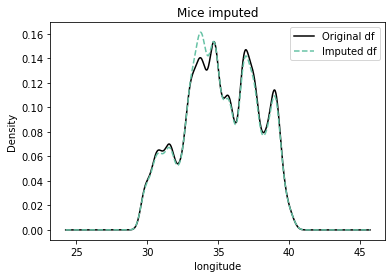

In [ ]:
#mice imputer appears to work better than than mean imputing
impute_checker('longitude', mice_train_features, 'Mice imputed')

In [ ]:
#mice imputing barely has an impact on variance
mice_train_features['longitude'].var(), train['longitude'].var()

(6.64908204803536, 6.798727549988317)

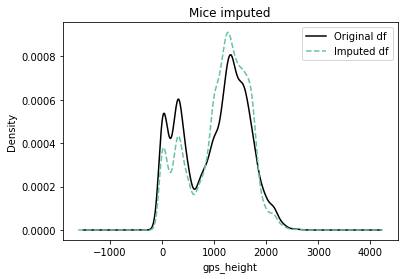

In [ ]:
#mice imputing works a lot better for gps height 
impute_checker('gps_height', mice_train_features, 'Mice imputed')

In [ ]:
#mice imputing does reduce variance, but not as much as mean imputing
mice_train_features['gps_height'].var(), train['gps_height'].var()

(299282.7167393309, 375237.21653622104)

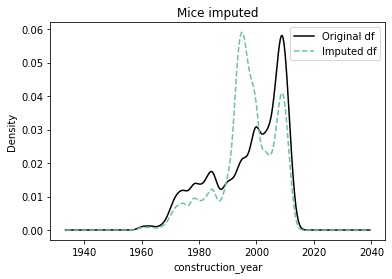

In [ ]:
#mean imuting results in a massive peak around 1995 that was originally not present in the data
impute_checker('construction_year', mice_train_features, 'Mice imputed')

In [ ]:
#mice imputing doesn't seem to work so well for the construction year
mice_train_features['construction_year'].var(), train['construction_year'].var()

(105.39007825453893, 155.55190735719395)

# Feature Engineering

##Decade 

Converting construction_year to categorical variable 

In [ ]:
mice_train_features['decade'] = mice_train_features['construction_year'].round() #creating new columns

In [ ]:
mice_test['decade'] = mice_test['construction_year'].round() #creating new columns

In [ ]:
# dividing the column decades

mice_train_features['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
mice_train_features['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
mice_train_features['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
mice_train_features['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
mice_train_features['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
mice_train_features['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [ ]:
# dividing the column decades

mice_test['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
mice_test['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
mice_test['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
mice_test['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
mice_test['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
mice_test['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [ ]:
mice_train_features['decade'].value_counts()

90s    25517
00s    17707
80s     5971
10s     5261
70s     4406
60s      538
Name: decade, dtype: int64

In [ ]:
mice_test['decade'].value_counts()

90s    6467
00s    4438
80s    1465
10s    1317
70s    1042
60s     121
Name: decade, dtype: int64

## Age
In the reports by wateraid tanzania it was mentioned that age of pump is highely correlated with functionality of pump and we can use construction_year and date_recorded features to create age feature


In [ ]:
#create age feature 
train_values['recorded_year'] = pd.DatetimeIndex(train_values ['date_recorded']).year
train_values[ 'age'] = train_values['recorded_year'] - mice_train_features['construction_year'].round()
train_values = train_values.drop('recorded_year',axis=1)
train_values[ 'age']

0        12.0
1         3.0
2         4.0
3        27.0
4        12.0
         ... 
59395    14.0
59396    15.0
59397     7.0
59398    15.0
59399     9.0
Name: age, Length: 59400, dtype: float64

In [ ]:
#create age feature test_values
test_values['recorded_year'] = pd.DatetimeIndex(test_values ['date_recorded']).year
test_values[ 'age'] = test_values['recorded_year'] - mice_test['construction_year'].round()
test_values = test_values.drop('recorded_year',axis=1)
test_values[ 'age']

0         1.0
1        13.0
2         3.0
3        26.0
4        13.0
         ... 
14845    23.0
14846    17.0
14847     3.0
14848     4.0
14849     5.0
Name: age, Length: 14850, dtype: float64

## Season
In the reports by wateraid tanzania different Season are mentioned 

In [ ]:
train_values['month'] = pd.DatetimeIndex(train_values['date_recorded']).month

# season encoder
season_mapper = {1: 'short dry',2:'short dry', 3: 'long rain', 4: 'long rain', 5: 'long rain',6: 'long dry', 
                 7: 'long dry', 8: 'long dry', 9: 'long dry', 10: 'long dry', 11:'short rain', 12:'short rain'}
#.p feature values to scale
train_values['season']=train_values['month'].replace(season_mapper)
train_values=train_values.drop('month', axis=1)


In [ ]:
train_values[['id', 'age', 'season']]

,id,age,season
0,69572.0,12.0,long rain
1,8776.0,3.0,long rain
2,34310.0,4.0,short dry
3,67743.0,27.0,short dry
4,19728.0,12.0,long dry
...,...,...,...
59395,60739.0,14.0,long rain
59396,27263.0,15.0,long rain
59397,37057.0,7.0,long rain
59398,31282.0,15.0,long rain


In [ ]:
test_values['month'] = pd.DatetimeIndex(test_values['date_recorded']).month

# season encoder
season_mapper = {1: 'short dry',2:'short dry', 3: 'long rain', 4: 'long rain', 5: 'long rain',6: 'long dry', 
                 7: 'long dry', 8: 'long dry', 9: 'long dry', 10: 'long dry', 11:'short rain', 12:'short rain'}
                 
#.p feature values to scale
test_values['season']=test_values['month'].replace(season_mapper)
test_values=test_values.drop('month', axis=1)


In [ ]:
test_values[['id', 'age', 'season']]

,id,age,season
0,50785,1.0,short dry
1,51630,13.0,short dry
2,17168,3.0,short dry
3,45559,26.0,short dry
4,49871,13.0,long rain
...,...,...,...
14845,39307,23.0,short dry
14846,18990,17.0,long rain
14847,28749,3.0,long rain
14848,33492,4.0,short dry


## Region district
In EDA we found district_codes are relevant in the region context. region_district feature captures this information 

In [ ]:
train_values['region_district'] = train_values['region']+ "-" + train_values['district_code'].astype('str')
train_values['region_district'] 

0             Iringa-5.0
1               Mara-2.0
2            Manyara-4.0
3            Mtwara-63.0
4             Kagera-1.0
              ...       
59395    Kilimanjaro-5.0
59396         Iringa-4.0
59397          Mbeya-7.0
59398         Dodoma-4.0
59399       Morogoro-2.0
Name: region_district, Length: 59400, dtype: object

In [ ]:
test_values['region_district'] = test_values['region']+ "-" + test_values['district_code'].astype('str')
test_values['region_district'] 

0        Manyara-3.0
1         Arusha-2.0
2        Singida-2.0
3         Lindi-43.0
4         Ruvuma-3.0
            ...     
14845      Pwani-1.0
14846      Tanga-7.0
14847    Singida-2.0
14848     Ruvuma-2.0
14849     Ruvuma-3.0
Name: region_district, Length: 14850, dtype: object

#Final 

In [ ]:
mice_train_data = mice_train_features[['id','gps_height', 'longitude', 'latitude', 'population', 'construction_year','decade', 'public_meeting']]
mice_train_data

,id,gps_height,longitude,latitude,population,construction_year,decade,public_meeting
0,69572.0,1390.000000,34.938093,-9.856322,109.000000,1999.000000,90s,1.0
1,8776.0,1399.000000,34.698766,-2.147466,280.000000,2010.000000,10s,2.0
2,34310.0,686.000000,37.460664,-3.821329,250.000000,2009.000000,00s,1.0
3,67743.0,263.000000,38.486161,-11.155298,58.000000,1986.000000,80s,1.0
4,19728.0,1141.695880,31.130847,-1.825359,606.283139,1998.628353,90s,1.0
...,...,...,...,...,...,...,...,...
59395,60739.0,1210.000000,37.169807,-3.253847,125.000000,1999.000000,90s,1.0
59396,27263.0,1212.000000,35.249991,-9.070629,56.000000,1996.000000,90s,1.0
59397,37057.0,774.207079,34.017087,-8.750434,546.960779,2004.031274,00s,1.0
59398,31282.0,1163.621189,35.861315,-6.378573,275.771544,1995.845985,90s,1.0


In [ ]:
mice_test_data = mice_test[['id','gps_height', 'longitude', 'latitude', 'population', 'construction_year','decade', 'public_meeting']]
mice_test_data

,id,gps_height,longitude,latitude,population,construction_year,decade,public_meeting
0,50785.0,1996.000000,35.290799,-4.059696,321.0,2012.0,10s,1.0
1,51630.0,1569.000000,36.656709,-3.309214,300.0,2000.0,00s,1.0
2,17168.0,1567.000000,34.767863,-5.004344,500.0,2010.0,10s,1.0
3,45559.0,267.000000,38.058046,-9.418672,250.0,1987.0,80s,2.0
4,49871.0,1260.000000,35.006123,-10.950412,60.0,2000.0,00s,2.0
...,...,...,...,...,...,...,...,...
14845,39307.0,34.000000,38.852669,-6.582841,20.0,1988.0,80s,1.0
14846,18990.0,461.998849,37.451633,-5.350428,2960.0,1994.0,90s,1.0
14847,28749.0,1476.000000,34.739804,-4.585587,200.0,2010.0,10s,1.0
14848,33492.0,998.000000,35.432732,-10.584159,150.0,2009.0,00s,1.0


In [ ]:
# drop values that we imputed using mice
train_values.drop(columns=['gps_height', 'longitude', 'latitude', 'population', 'construction_year','public_meeting'],inplace=True)

In [ ]:
# drop values that we imputed using mice
test_values.drop(columns=['gps_height', 'longitude', 'latitude', 'population', 'construction_year','public_meeting'],inplace=True)

In [ ]:
# add mice imputed columns to dataframe
final_train = pd.merge(train_values , mice_train_data, on='id')
final_train.head()

,id,amount_tsh,date_recorded,funder,installer,wpt_name,num_private,basin,subvillage,region,...,age,season,region_district,gps_height,longitude,latitude,population,construction_year,decade,public_meeting
0,69572.0,6000.0,2011-03-14,Roman,Roman,none,NaN,Lake Nyasa,Mnyusi B,Iringa,...,12.0,long rain,Iringa-5.0,1390.00000,34.938093,-9.856322,109.000000,1999.000000,90s,1.0
1,8776.0,NaN,2013-03-06,Grumeti,GRUMETI,Zahanati,NaN,Lake Victoria,Nyamara,Mara,...,3.0,long rain,Mara-2.0,1399.00000,34.698766,-2.147466,280.000000,2010.000000,10s,2.0
2,34310.0,25.0,2013-02-25,Lottery Club,world vision,Kwa Mahundi,NaN,Pangani,Majengo,Manyara,...,4.0,short dry,Manyara-4.0,686.00000,37.460664,-3.821329,250.000000,2009.000000,00s,1.0
3,67743.0,NaN,2013-01-28,Unicef,Unicef,Zahanati Ya Nanyumbu,NaN,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,27.0,short dry,Mtwara-63.0,263.00000,38.486161,-11.155298,58.000000,1986.000000,80s,1.0
4,19728.0,NaN,2011-07-13,Action In A,Artisan,Shuleni,NaN,Lake Victoria,Kyanyamisa,Kagera,...,12.0,long dry,Kagera-1.0,1141.69588,31.130847,-1.825359,606.283139,1998.628353,90s,1.0


In [ ]:
# add mice imputed columns to dataframe
final_test = pd.merge(test_values , mice_test_data, on='id')
final_test.head()

,id,amount_tsh,date_recorded,funder,installer,wpt_name,num_private,basin,subvillage,region,...,age,season,region_district,gps_height,longitude,latitude,population,construction_year,decade,public_meeting
0,50785,NaN,2013-02-04,Dmdd,DMDD,Dinamu Secondary School,NaN,Internal,Magoma,Manyara,...,1.0,short dry,Manyara-3.0,1996.0,35.290799,-4.059696,321.0,2012.0,10s,1.0
1,51630,NaN,2013-02-04,Government Of Tanzania,DWE,Kimnyak,NaN,Pangani,Kimnyak,Arusha,...,13.0,short dry,Arusha-2.0,1569.0,36.656709,-3.309214,300.0,2000.0,00s,1.0
2,17168,NaN,2013-02-01,Unknown,Unknown,Puma Secondary,NaN,Internal,Msatu,Singida,...,3.0,short dry,Singida-2.0,1567.0,34.767863,-5.004344,500.0,2010.0,10s,1.0
3,45559,NaN,2013-01-22,Finn Water,FINN WATER,Kwa Mzee Pange,NaN,Ruvuma / Southern Coast,Kipindimbi,Lindi,...,26.0,short dry,Lindi-43.0,267.0,38.058046,-9.418672,250.0,1987.0,80s,2.0
4,49871,500.0,2013-03-27,Bruder,BRUDER,Kwa Mzee Turuka,NaN,Ruvuma / Southern Coast,Losonga,Ruvuma,...,13.0,long rain,Ruvuma-3.0,1260.0,35.006123,-10.950412,60.0,2000.0,00s,2.0


In [ ]:
final_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'installer', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'installer_cat',
       'funder_cat', 'age', 'season', 'region_district', 'gps_height',
       'longitude', 'latitude', 'population', 'construction_year', 'decade',
       'public_meeting'],
      dtype='object')

##Drop redundant and unuseful features


In [ ]:
final_train.drop(columns=['date_recorded','recorded_by','permit','management_group','scheme_management',
                 'quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type',
                 'waterpoint_type_group','wpt_name','scheme_name',
                 'district_code','region_code','region','subvillage', 'lga', 'ward','num_private',
                 'amount_tsh','scheme_name','funder','installer'],inplace=True )

In [ ]:
final_test.drop(columns=['date_recorded','recorded_by','permit','management_group','scheme_management',
                 'quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type',
                 'waterpoint_type_group','wpt_name','scheme_name',
                 'district_code','region_code','region','subvillage', 'lga', 'ward','num_private',
                 'amount_tsh','scheme_name','funder','installer'],inplace=True )

In [ ]:
final_train

,id,basin,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,installer_cat,...,age,season,region_district,gps_height,longitude,latitude,population,construction_year,decade,public_meeting
0,69572.0,Lake Nyasa,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,Others,...,12.0,long rain,Iringa-5.0,1390.000000,34.938093,-9.856322,109.000000,1999.000000,90s,1.0
1,8776.0,Lake Victoria,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,Others,...,3.0,long rain,Mara-2.0,1399.000000,34.698766,-2.147466,280.000000,2010.000000,10s,2.0
2,34310.0,Pangani,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,world vision,...,4.0,short dry,Manyara-4.0,686.000000,37.460664,-3.821329,250.000000,2009.000000,00s,1.0
3,67743.0,Ruvuma / Southern Coast,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,Unicef,...,27.0,short dry,Mtwara-63.0,263.000000,38.486161,-11.155298,58.000000,1986.000000,80s,1.0
4,19728.0,Lake Victoria,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,Others,...,12.0,long dry,Kagera-1.0,1141.695880,31.130847,-1.825359,606.283139,1998.628353,90s,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,60739.0,Pangani,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,CES,...,14.0,long rain,Kilimanjaro-5.0,1210.000000,37.169807,-3.253847,125.000000,1999.000000,90s,1.0
59395,27263.0,Rufiji,gravity,vwc,pay annually,soft,enough,river,communal standpipe,Others,...,15.0,long rain,Iringa-4.0,1212.000000,35.249991,-9.070629,56.000000,1996.000000,90s,1.0
59396,37057.0,Rufiji,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,Unknown,...,7.0,long rain,Mbeya-7.0,774.207079,34.017087,-8.750434,546.960779,2004.031274,00s,1.0
59397,31282.0,Rufiji,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,Others,...,15.0,long rain,Dodoma-4.0,1163.621189,35.861315,-6.378573,275.771544,1995.845985,90s,1.0


In [ ]:
final_test

,id,basin,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,installer_cat,...,age,season,region_district,gps_height,longitude,latitude,population,construction_year,decade,public_meeting
0,50785,Internal,other,parastatal,never pay,soft,seasonal,rainwater harvesting,other,Others,...,1.0,short dry,Manyara-3.0,1996.000000,35.290799,-4.059696,321.0,2012.0,10s,1.0
1,51630,Pangani,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,DWE,...,13.0,short dry,Arusha-2.0,1569.000000,36.656709,-3.309214,300.0,2000.0,00s,1.0
2,17168,Internal,other,vwc,never pay,soft,insufficient,rainwater harvesting,other,Unknown,...,3.0,short dry,Singida-2.0,1567.000000,34.767863,-5.004344,500.0,2010.0,10s,1.0
3,45559,Ruvuma / Southern Coast,other,vwc,unknown,soft,dry,shallow well,other,Others,...,26.0,short dry,Lindi-43.0,267.000000,38.058046,-9.418672,250.0,1987.0,80s,2.0
4,49871,Ruvuma / Southern Coast,gravity,water board,pay monthly,soft,enough,spring,communal standpipe,Others,...,13.0,long rain,Ruvuma-3.0,1260.000000,35.006123,-10.950412,60.0,2000.0,00s,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,Wami / Ruvu,mono,vwc,never pay,soft,enough,river,communal standpipe,Others,...,23.0,short dry,Pwani-1.0,34.000000,38.852669,-6.582841,20.0,1988.0,80s,1.0
14846,18990,Pangani,nira/tanira,vwc,pay annually,salty,insufficient,shallow well,hand pump,Others,...,17.0,long rain,Tanga-7.0,461.998849,37.451633,-5.350428,2960.0,1994.0,90s,1.0
14847,28749,Internal,gravity,vwc,never pay,soft,insufficient,dam,communal standpipe,Unknown,...,3.0,long rain,Singida-2.0,1476.000000,34.739804,-4.585587,200.0,2010.0,10s,1.0
14848,33492,Lake Nyasa,gravity,vwc,never pay,soft,insufficient,river,communal standpipe,DWE,...,4.0,short dry,Ruvuma-2.0,998.000000,35.432732,-10.584159,150.0,2009.0,00s,1.0


In [ ]:
final_test.columns

Index(['id', 'basin', 'extraction_type_group', 'management', 'payment',
       'water_quality', 'quantity', 'source', 'waterpoint_type',
       'installer_cat', 'funder_cat', 'age', 'season', 'region_district',
       'gps_height', 'longitude', 'latitude', 'population',
       'construction_year', 'decade', 'public_meeting'],
      dtype='object')

In [ ]:
# saving files
final_train.to_csv('/content/drive/MyDrive/cs1/DATA_PRE_PROCESS/final_train.csv')
final_test.to_csv('/content/drive/MyDrive/cs1/DATA_PRE_PROCESS/final_test.csv')